In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings
plt.style.use("ggplot")
rcParams["figure.figsize"] = [12, 9]
rcParams["xtick.labelsize"] = 15
rcParams["ytick.labelsize"] = 15
rcParams["font.size"] = 15

warnings.filterwarnings("ignore")
df = pd.read_csv("Dataset.csv", sep=",", encoding='Latin-1')

In [ ]:
df.head()

,OrderLineID,OrderID,StockItemID,Description,Quantity,UnitPriceSales,TaxRate,OrderDate,MonthSold,SaleAmount,CustomerID,CustomerPurchaseOrderNumber,PackageTypeID,ColorID,Brand,Size
0,1,45,164,32 mm Double sided bubble wrap 50m,50,168,15,01/01/2015,2015-01,9660.00,832,12126,7,NaN,NaN,50m
1,2,1,67,Ride on toy sedan car (Black) 1/12 scale,10,345,15,01/01/2015,2015-01,3967.50,832,12126,7,3.0,Northwind,1/12 scale
2,3,2,50,Developer joke mug - old C developers never di...,9,20,15,01/01/2015,2015-01,201.83,803,15342,7,35.0,NaN,NaN
3,4,46,89,The Gu red shirt XML tag t-shirt (Black) 3XS,72,27,15,01/01/2015,2015-01,2235.60,803,15342,7,3.0,NaN,3XS
4,5,46,171,32 mm Anti static bubble wrap (Blue) 10m,90,48,15,01/01/2015,2015-01,4968.00,803,15342,7,4.0,NaN,10m


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231412 entries, 0 to 231411
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   OrderLineID                  231412 non-null  int64  
 1   OrderID                      231412 non-null  int64  
 2   StockItemID                  231412 non-null  int64  
 3   Description                  231412 non-null  object 
 4   Quantity                     231412 non-null  int64  
 5   UnitPriceSales               231412 non-null  int64  
 6   TaxRate                      231412 non-null  int64  
 7   OrderDate                    231412 non-null  object 
 8   MonthSold                    231412 non-null  object 
 9   SaleAmount                   231412 non-null  float64
 10  CustomerID                   231412 non-null  int64  
 11  CustomerPurchaseOrderNumber  231412 non-null  int64  
 12  PackageTypeID                231412 non-null  int64  
 13 

In [ ]:
#creating a cut down dataframe
salesData = df[['Description', 'MonthSold', 'Quantity', 'SaleAmount']]
salesData2 = df[['Description', 'MonthSold',  'SaleAmount']]


In [ ]:
salesData

,Description,MonthSold,Quantity,SaleAmount
0,32 mm Double sided bubble wrap 50m,2015-01,50,9660.00
1,Ride on toy sedan car (Black) 1/12 scale,2015-01,10,3967.50
2,Developer joke mug - old C developers never di...,2015-01,9,201.83
3,The Gu red shirt XML tag t-shirt (Black) 3XS,2015-01,72,2235.60
4,32 mm Anti static bubble wrap (Blue) 10m,2015-01,90,4968.00
...,...,...,...,...
231407,RC toy sedan car with remote control (Red) 1/5...,2018-05,6,258.75
231408,USB rocket launcher (Gray),2018-05,1,43.13
231409,Alien officer hoodie (Black) XL,2018-05,9,543.38
231410,20 mm Anti static bubble wrap (Blue) 50m,2018-05,40,7038.00


Monthly Sales

In [ ]:
salesByMonth = salesData.groupby(salesData['MonthSold']).sum()

In [ ]:
salesByMonth2 = salesData2.groupby(salesData['MonthSold']).sum()
salesByMonth2[34:]

,SaleAmount
MonthSold,
2017-11,7315061.14
2017-12,7947394.62
2018-01,7939576.21
2018-02,7056720.37
2018-03,8274583.06
2018-04,8156650.10
2018-05,8844549.33


In [ ]:
salesByMonth.tail()

,Quantity,SaleAmount
MonthSold,,
2018-01,261688,7939576.21
2018-02,222689,7056720.37
2018-03,261119,8274583.06
2018-04,263172,8156650.10
2018-05,282360,8844549.33


Text(0.5, 1.0, 'Sales by Month')

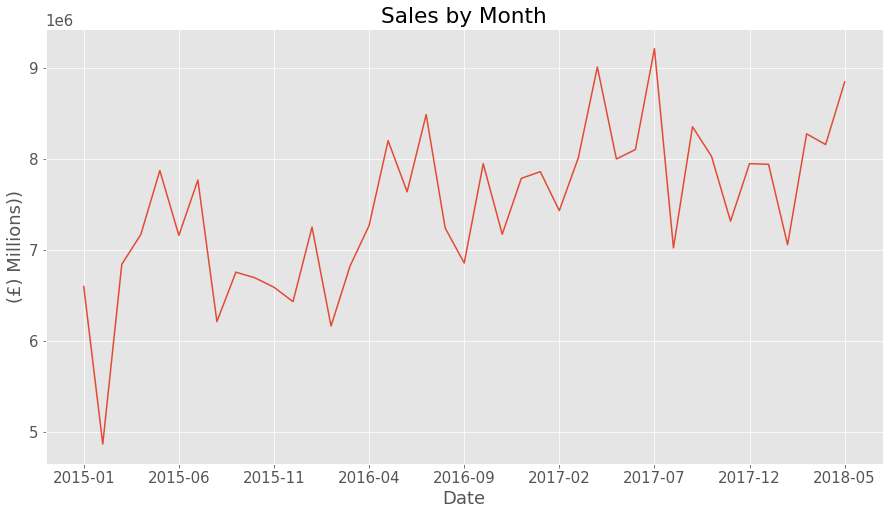

In [ ]:
monthlySalesPlot = salesByMonth['SaleAmount'].plot(figsize=(15,8))
monthlySalesPlot.set_xlabel("Date")
monthlySalesPlot.set_ylabel("(£) Millions))")
monthlySalesPlot.set_title('Sales by Month')

<Figure size 864x648 with 0 Axes>

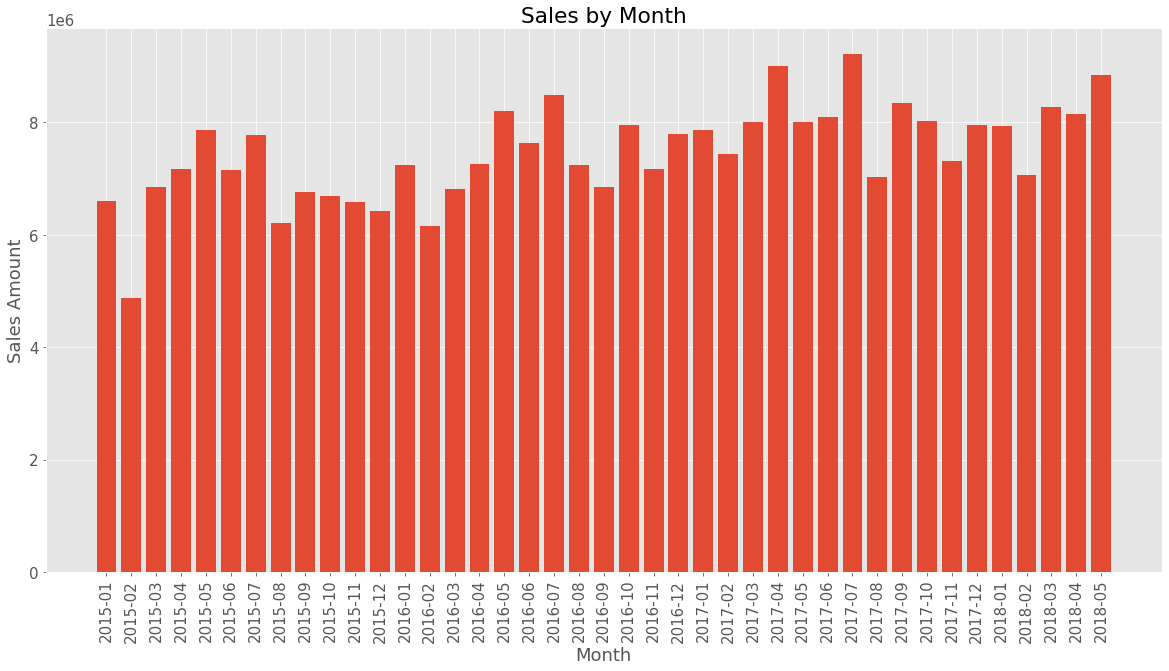

In [ ]:
fig = plt.figure()
plt.figure(figsize=(20,10))

plt.bar(salesByMonth.index, salesByMonth['SaleAmount'])
plt.xticks(salesByMonth.index, rotation='vertical')
plt.ylabel('Sales Amount')
plt.xlabel('Month')
plt.title("Sales by Month")


plt.show()

Best Month of Sales

In [ ]:
bestSalesMonth = salesByMonth.sort_values(by='SaleAmount', ascending=False).head()

In [ ]:
bestSalesMonth

,Quantity,SaleAmount
MonthSold,,
2017-07,280262,9210146.87
2017-04,265378,9008982.11
2018-05,282360,8844549.33
2016-07,260266,8486646.24
2017-09,243667,8352277.36


Worst Month of Sales

In [ ]:
worstSalesMonth = salesByMonth.sort_values(by='SaleAmount', ascending=False).tail()

In [ ]:
worstSalesMonth

,Quantity,SaleAmount
MonthSold,,
2015-11,201016,6589175.21
2015-12,199675,6430982.82
2015-08,197961,6212109.69
2016-02,188481,6162988.24
2015-02,144382,4866715.31


Best Month for Orders

In [ ]:
bestOrdersMonth = salesByMonth.sort_values(by='Quantity', ascending=False).head()
bestOrdersMonth

,Quantity,SaleAmount
MonthSold,,
2018-05,282360,8844549.33
2017-07,280262,9210146.87
2017-04,265378,9008982.11
2018-04,263172,8156650.10
2018-01,261688,7939576.21


Worst Month for Orders

In [ ]:
worstOrdersMonth = salesByMonth.sort_values(by='Quantity', ascending=False).tail()
worstOrdersMonth

,Quantity,SaleAmount
MonthSold,,
2015-09,198537,6755110.27
2015-08,197961,6212109.69
2015-01,196295,6597858.56
2016-02,188481,6162988.24
2015-02,144382,4866715.31


Text(0.5, 1.0, 'Total Orders by Month')

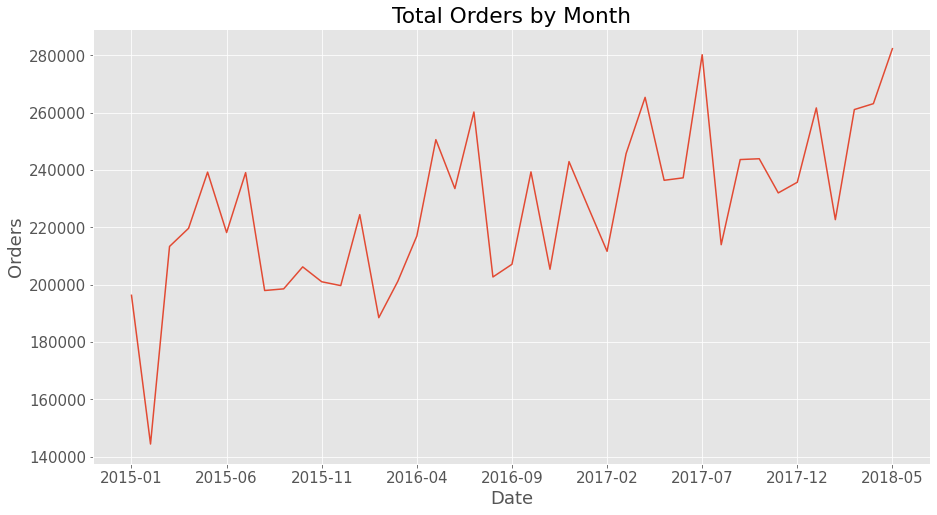

In [ ]:
#Orders by month plot
monthlySalesPlot = salesByMonth['Quantity'].plot(figsize=(15,8))
monthlySalesPlot.set_xlabel("Date")
monthlySalesPlot.set_ylabel("Orders")
monthlySalesPlot.set_title('Total Orders by Month')

<Figure size 864x648 with 0 Axes>

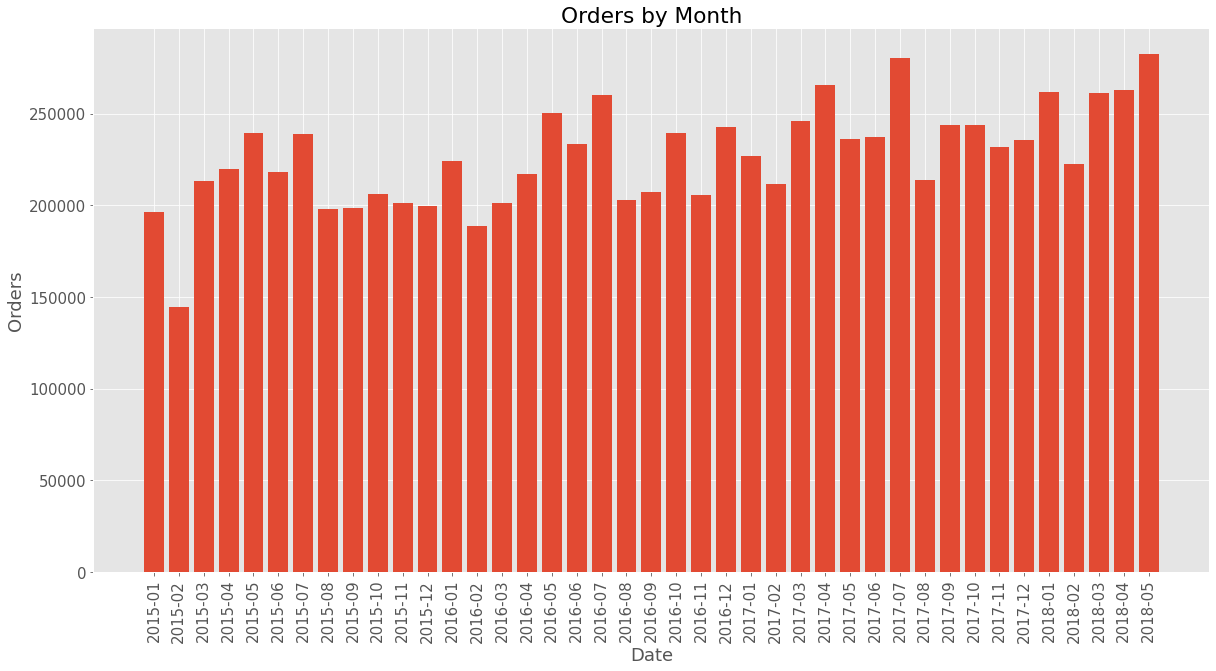

In [ ]:
fig = plt.figure()
plt.figure(figsize=(20,10))

plt.bar(salesByMonth.index, salesByMonth['Quantity'])
plt.xticks(salesByMonth.index, rotation='vertical')
plt.ylabel('Orders')
plt.xlabel('Date')
plt.title("Orders by Month")


plt.show()

Most Ordered Product

In [ ]:
MostOrdered = salesData.groupby('Description').sum()
MostOrdered = MostOrdered.sort_values(by='Quantity', ascending=False).head(5)

In [ ]:
MostOrdered

,Quantity,SaleAmount
Description,,
Black and orange fragile despatch tape 48mmx75m,207324,1323245.43
Black and orange fragile despatch tape 48mmx100m,193680,1369801.80
Clear packaging tape 48mmx75m,158626,793529.18
3 kg Courier post bag (White) 300x190x95mm,152375,173480.35
Shipping carton (Brown) 356x356x279mm,152125,535330.57


<Figure size 864x648 with 0 Axes>

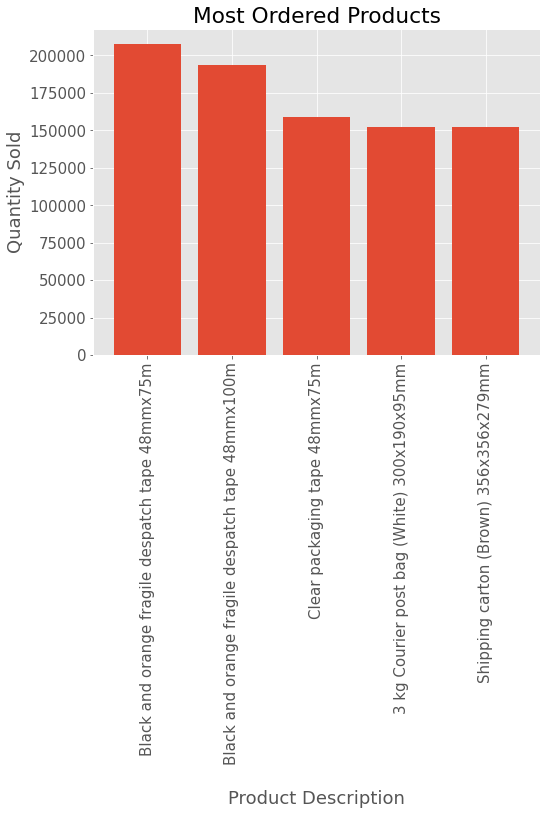

In [ ]:
fig = plt.figure()
plt.figure(figsize=(8,6))
plt.bar(MostOrdered.index, MostOrdered['Quantity'])
plt.xticks(MostOrdered.index, rotation='vertical')
plt.ylabel('Quantity Sold')
plt.xlabel('\nProduct Description')
plt.title("Most Ordered Products")
plt.show()

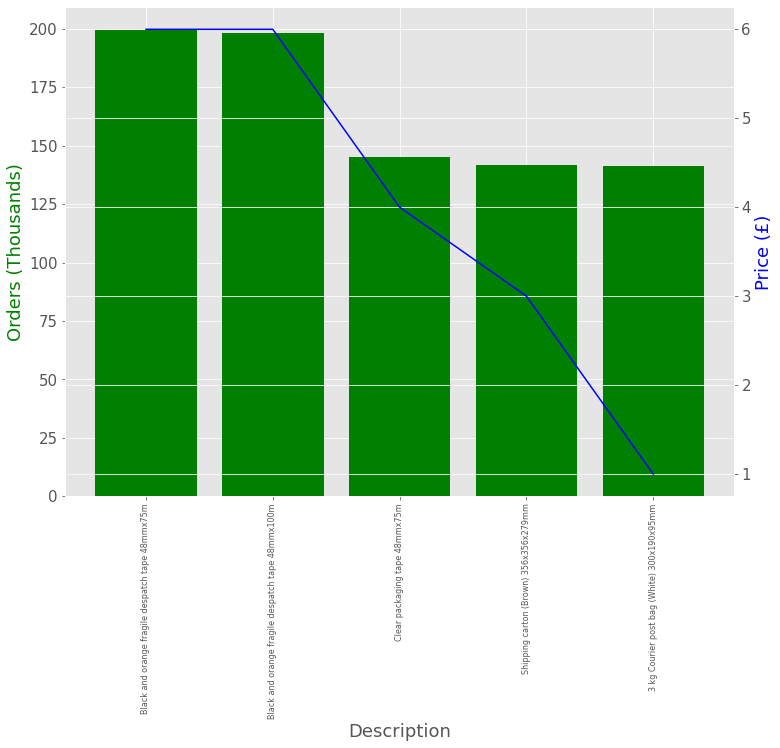

In [ ]:
#Best Orders/Price Overlay
salesData1 = df[['Description', 'Quantity', 'UnitPriceSales']]
prices = salesData1.groupby('Description').mean()
prices = prices.sort_values(by='Quantity', ascending=False).head(5)

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(prices.index, prices.Quantity, color='G')
ax2.plot(prices.index, prices.UnitPriceSales, 'b-')

ax1.set_xlabel('Description')
ax1.set_ylabel('Orders (Thousands)', color='g')
ax2.set_ylabel('Price (£)', color='b')
ax1.set_xticklabels(prices.index, rotation='vertical', size=8)
plt.show()

Least Ordered Product

In [ ]:
LeastOrdered = salesData.groupby('Description').sum()
LeastOrdered = LeastOrdered.sort_values(by='Quantity', ascending=False).tail()
LeastOrdered

,Quantity,SaleAmount
Description,,
Superhero action jacket (Blue) L,5464,282762.00
Superhero action jacket (Blue) S,5426,233998.89
Superhero action jacket (Blue) XXL,5404,279657.00
DBA joke mug - mind if I join you? (Black),5402,121142.46
Superhero action jacket (Blue) XL,5373,278052.75


<Figure size 864x648 with 0 Axes>

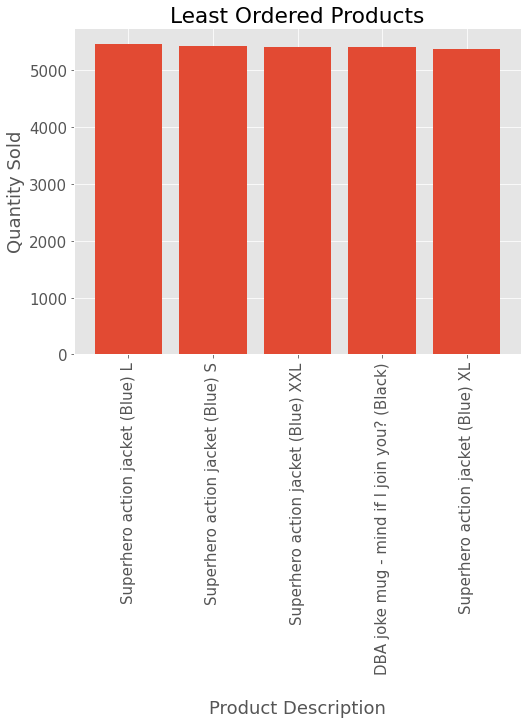

In [ ]:
fig = plt.figure()
plt.figure(figsize=(8,6))
plt.bar(LeastOrdered.index, LeastOrdered['Quantity'])
plt.xticks(LeastOrdered.index, rotation='vertical')
plt.ylabel('Quantity Sold')
plt.xlabel('\nProduct Description')
plt.title("Least Ordered Products")
plt.show()

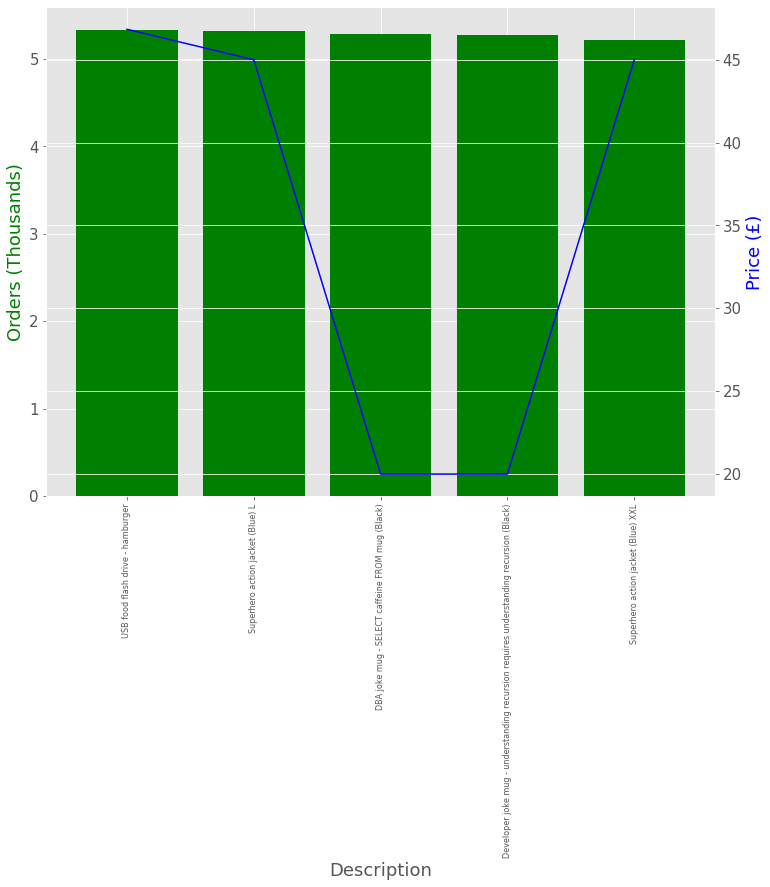

In [ ]:
salesData1 = df[['Description', 'Quantity', 'UnitPriceSales']]
prices = salesData1.groupby('Description').mean()
prices = prices.sort_values(by='Quantity', ascending=False).tail(5)

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(prices.index, prices.Quantity, color='g')
ax2.plot(prices.index, prices.UnitPriceSales, 'b-')

ax1.set_xlabel('Description')
ax1.set_ylabel('Orders (Thousands)', color='g')
ax2.set_ylabel('Price (£)', color='b')
ax1.set_xticklabels(prices.index, rotation='vertical', size=8)
plt.show()

Most Profitable Product

In [ ]:
MostProfitable = salesData.groupby('Description').sum()
MostProfitable = MostProfitable.sort_values(by='SaleAmount', ascending=False).head(5)
MostProfitable

,Quantity,SaleAmount
Description,,
Air cushion machine (Blue),5849,19160010.78
32 mm Anti static bubble wrap (Blue) 50m,60800,11012400.00
10 mm Anti static bubble wrap (Blue) 50m,63930,10917645.75
20 mm Double sided bubble wrap 50m,57540,10719702.00
32 mm Double sided bubble wrap 50m,55270,10678164.00


<Figure size 864x648 with 0 Axes>

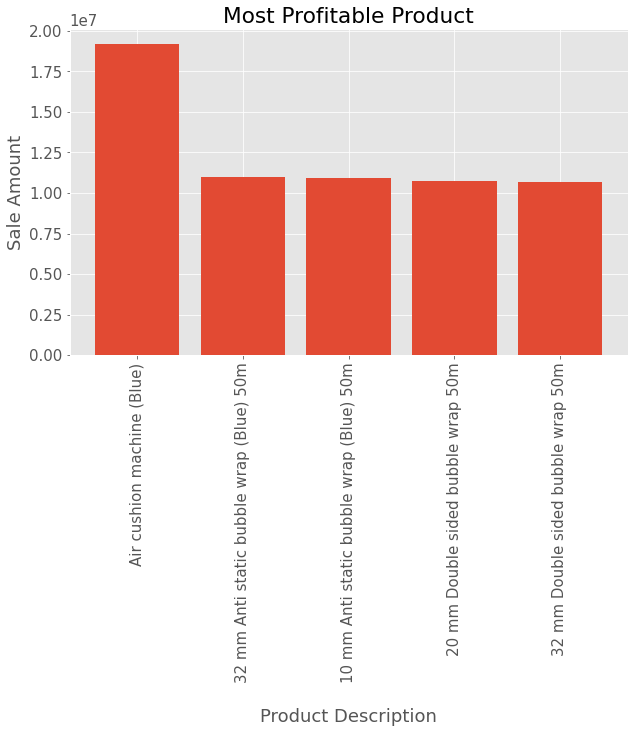

In [ ]:
fig = plt.figure()
plt.figure(figsize=(10,6))

plt.bar(MostProfitable.index, MostProfitable['SaleAmount'])
plt.xticks(MostProfitable.index, rotation='vertical')
plt.ylabel('Sale Amount')
plt.xlabel('\nProduct Description')
plt.title("Most Profitable Product")
plt.show()

Least Profitable Product

In [ ]:
LeastProfitable = salesData.groupby('Description').sum()
LeastProfitable = LeastProfitable.sort_values(by='SaleAmount', ascending=False).tail()
LeastProfitable 

,Quantity,SaleAmount
Description,,
Developer joke mug - when your hammer is C++ (Black),5559,124663.18
DBA joke mug - SELECT caffeine FROM mug (Black),5471,122689.98
DBA joke mug - mind if I join you? (Black),5402,121142.46
Packing knife with metal insert blade (Yellow) 18mm,27030,111904.20
Packing knife with metal insert blade (Yellow) 9mm,30350,98948.83


<Figure size 864x648 with 0 Axes>

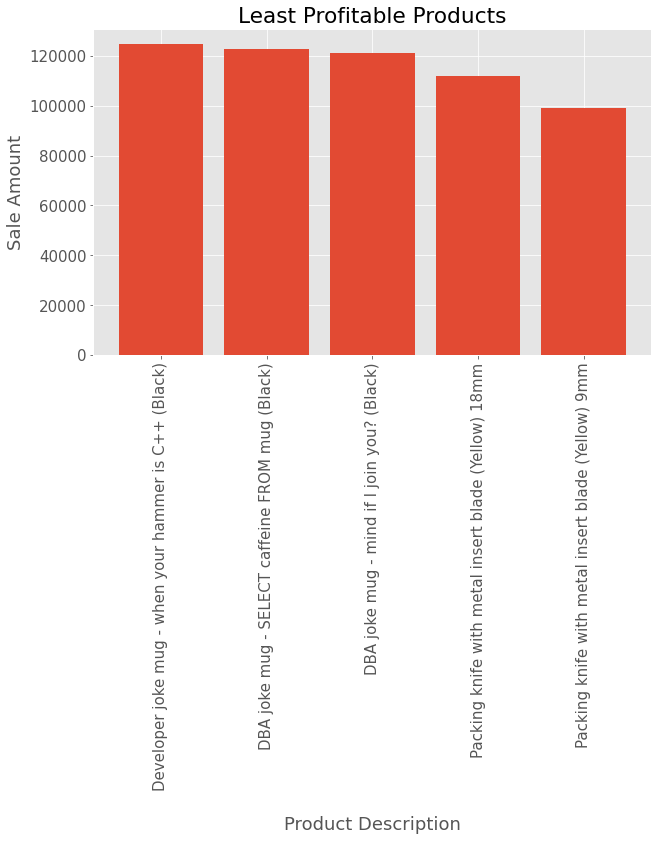

In [ ]:
fig = plt.figure()
plt.figure(figsize=(10,6))

plt.bar(LeastProfitable.index, LeastProfitable['SaleAmount'])
plt.xticks(LeastProfitable.index, rotation='vertical')
plt.ylabel('Sale Amount')
plt.xlabel('\nProduct Description')
plt.title("Least Profitable Products")
plt.show()

Most Profitable ColorID

In [ ]:
BestSellingColorDF = df[['ColorID', 'SaleAmount']]

BestSellingColorID = BestSellingColorDF.groupby('ColorID').sum()
BestSellingColorID = BestSellingColorID.sort_values(by='SaleAmount', ascending=False)
BestSellingColorID

,SaleAmount
ColorID,
4.0,61934209.69
3.0,47381775.48
35.0,30768572.64
12.0,10235634.71
18.0,8523225.00
28.0,8153157.21
36.0,2570502.74


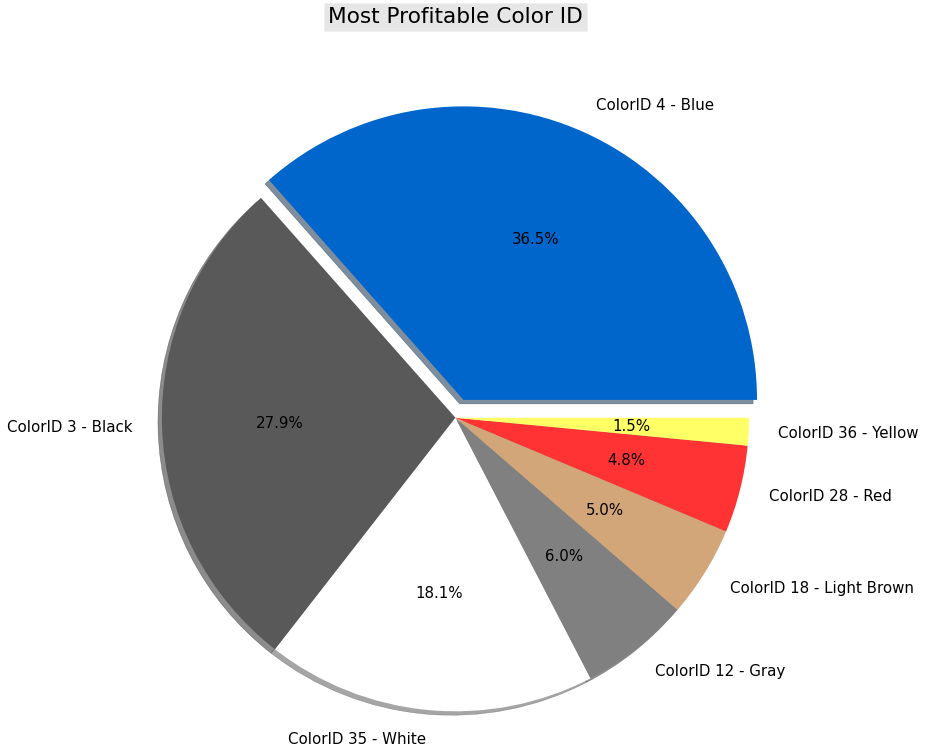

In [ ]:
vals = [61934209.69, 47381775.48, 30768572.64, 10235634.71, 8523225.00, 8153157.21, 2570502.74]
color = ['ColorID 4 - Blue', 'ColorID 3 - Black', 'ColorID 35 - White', 'ColorID 12 - Gray', 'ColorID 18 - Light Brown', 'ColorID 28 - Red', 'ColorID 36 - Yellow']
colors = ["#0066cc", "#595959", "#ffffff", "#808080", "#d2a679", "#ff3333", "#ffff66"]
plt.axis('equal')
plt.title('Most Profitable Color ID', pad=150,  bbox={'facecolor':'0.9'})

plt.pie(vals, labels=color, radius=1.5, autopct='%0.1f%%', colors=colors, shadow=True, explode=[0.1,0,0,0,0,0,0])
plt.show()

Most Ordered ColorID

In [ ]:
MostOrderedColorDF = df[['ColorID', 'Quantity']]

MostOrderedColorID = MostOrderedColorDF.groupby('ColorID').sum()
MostOrderedColorID = MostOrderedColorID.sort_values(by='Quantity', ascending=False)
MostOrderedColorID

,Quantity
ColorID,
3.0,1167677
35.0,1025157
4.0,605738
12.0,309847
18.0,274500
28.0,29033
36.0,11562


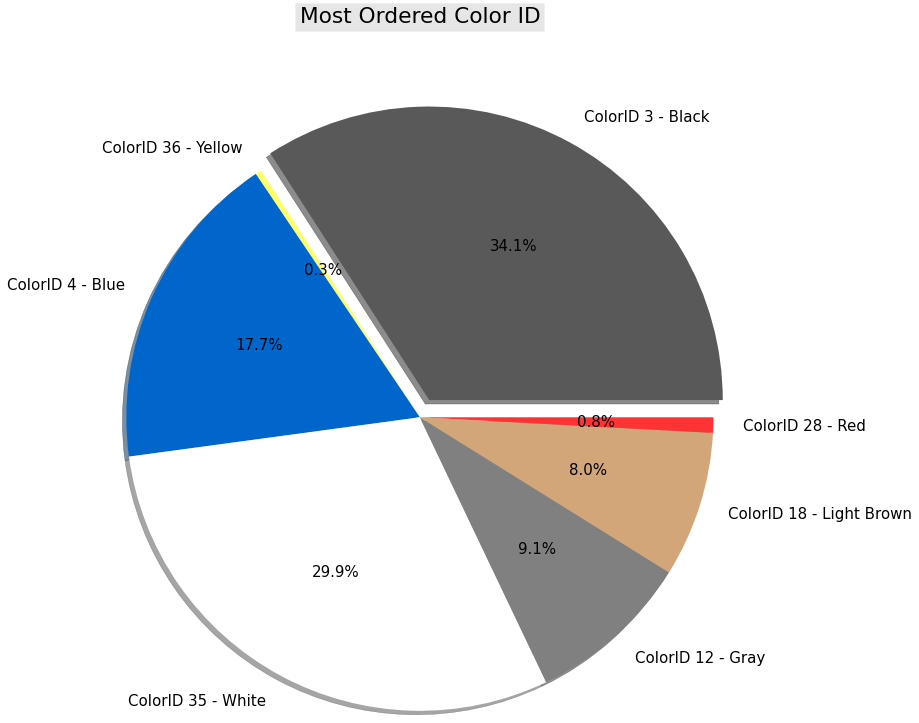

In [ ]:
vals = [1167677, 11562, 605738, 1025157, 309847, 274500, 29033]
color = ['ColorID 3 - Black', 'ColorID 36 - Yellow', 'ColorID 4 - Blue', 'ColorID 35 - White', 'ColorID 12 - Gray', 'ColorID 18 - Light Brown', 'ColorID 28 - Red']
colors = ['#595959', '#ffff66', '#0066cc', '#ffffff', '#808080', '#d2a679', '#ff3333']
plt.axis('equal')
plt.title('Most Ordered Color ID', pad=150,  bbox={'facecolor':'0.9'})
plt.pie(vals, labels=color, radius=1.5, autopct='%0.1f%%', colors=colors, shadow=True, explode=[0.1,0,0,0,0,0,0])
plt.show()

Most Valued Customer

In [ ]:
customer = df[['Description', 'Quantity', 'SaleAmount', 'CustomerID']]

MostValuedCustomer = customer.groupby('CustomerID').sum()
MostValuedCustomer = MostValuedCustomer.sort_values(by='SaleAmount', ascending=False).head()
MostValuedCustomer

,Quantity,SaleAmount
CustomerID,,
149,16508,662878.80
132,16445,654689.88
977,15929,650514.20
580,16999,641944.13
964,15104,634885.95


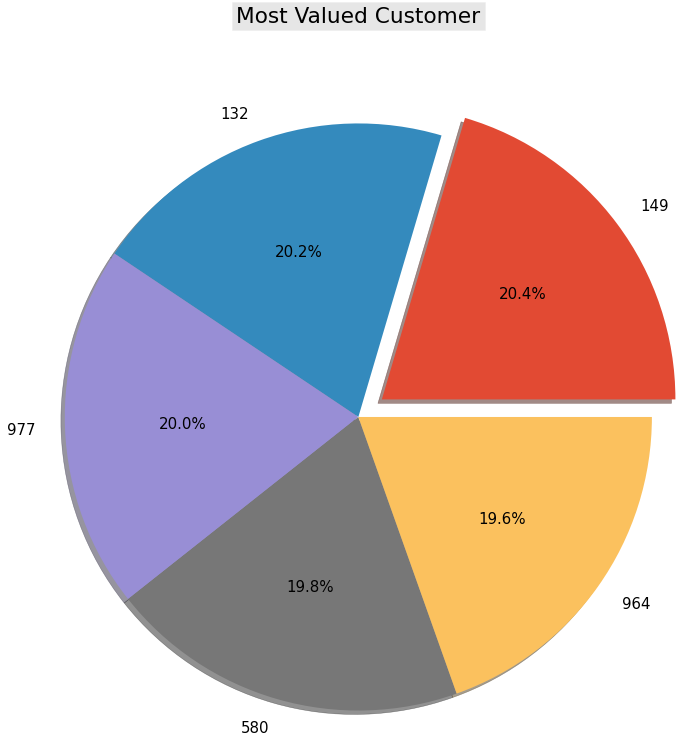

In [ ]:
vals = [662878.80, 654689.88, 650514.20, 641944.13, 634885.95]
customer = ['149', '132', '977', '580', '964']
plt.axis('equal')
plt.title('Most Valued Customer', pad=150,  bbox={'facecolor':'0.9'})
plt.pie(vals, labels=customer, radius=1.5, autopct='%0.1f%%', shadow=True, explode=[0.15,0,0,0,0])
plt.show() 

Products Most Often Sold Together

In [ ]:
df1 = df[['Description', 'MonthSold', 'Quantity', 'SaleAmount','OrderID']]
df1 = df1[df1['OrderID'].duplicated(keep=False)]
df1['Grouped'] = df1.groupby('OrderID')['Description'].transform(lambda x: ','.join(x))
df1 = df1[['OrderID', 'Grouped']].drop_duplicates()
df1.head()

,OrderID,Grouped
2,2,Developer joke mug - old C developers never di...
3,46,"The Gu red shirt XML tag t-shirt (Black) 3XS,3..."
6,47,"10 mm Anti static bubble wrap (Blue) 50m,Void ..."
10,4,"Permanent marker black 5mm nib (Black) 5mm,Fur..."
13,5,"Plush shark slippers (Gray) L,Dinosaur battery..."


In [ ]:
from itertools import combinations
from collections import Counter

count = Counter()
for row in df1['Grouped']:
  row_list = row.split(',')
  count.update(Counter(combinations(row_list, 2)))#no 2 returns amount bought together, 3 returns 3 items

for key, value in count.most_common(10):
  print(key, value)

('10 mm Anti static bubble wrap (Blue) 50m', 'Furry gorilla with big eyes slippers (Black) L') 21
('Shipping carton (Brown) 457x279x279mm', 'Developer joke mug - there are 10 types of people in the world (Black)') 20
('Developer joke mug - old C developers never die (White)', 'Void fill 400 L bag (White) 400L') 20
('RC toy sedan car with remote control (Red) 1/50 scale', 'Black and orange handle with care despatch tape  48mmx75m') 19
('The Gu red shirt XML tag t-shirt (Black) 3XS', 'Shipping carton (Brown) 457x279x279mm') 18
('USB rocket launcher (Gray)', '10 mm Double sided bubble wrap 20m') 18
('Ogre battery-powered slippers (Green) L', 'Furry gorilla with big eyes slippers (Black) XL') 18
('Alien officer hoodie (Black) 4XL', '32 mm Anti static bubble wrap (Blue) 10m') 18
('Red and white urgent  heavy despatch tape  48mmx100m', 'Superhero action jacket (Blue) L') 18
('Air cushion film 200mmx200mm 325m', 'Medium sized bubblewrap roll 20m') 18
